In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#import os 


In [2]:
df_train =  pd.read_csv('../CSE519-HW2/train.csv', nrows = 10_000_000) # Reading 1/4th of the dataset now
#df_train =  pd.read_csv('../CSE519-HW2/train.csv') #To read the whole dataset

In [3]:
df_train.dtypes
#Pickup_datetime is of type object. So converting it to Datetime
df_train['pickup_datetime'] = pd.to_datetime(df_train['pickup_datetime'], format='%Y-%m-%d %H:%M:%S UTC')
df_train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1


In [4]:
df_train.dtypes

key                          object
fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
dtype: object

In [4]:
print('Old size:',len(df_train))
#Dropping column 'key' as it redundant with pickup_datetime
df_train = df_train.drop(columns = 'key')
#Min fare amount of taxi ride is 2.50, So dropping rides with fare below 2.50
df_train = df_train[df_train.fare_amount>=2.50]
print('New size:',len(df_train))

Old size: 10000000
New size: 9999159


In [5]:
print(df_train.isnull().sum())
print('Old size:',len(df_train))
#Dropping null values rows
df_train = df_train.dropna()
print('New size:',len(df_train))

fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    69
dropoff_latitude     69
passenger_count       0
dtype: int64
Old size: 9999159
New size: 9999090


In [8]:
print("Range of Pickup Latitude in training data set:", (min(df_train['pickup_latitude']),max(df_train['pickup_latitude'])))
print("Range of Dropoff Latitude in training data set:", (min(df_train['dropoff_latitude']),max(df_train['dropoff_longitude'])))
print("Range of Pickup Longitude in training data set:", (min(df_train['pickup_longitude']),max(df_train['pickup_longitude'])))
print("Range of Dropoff Longitude in training data set:", (min(df_train['dropoff_longitude']),max(df_train['dropoff_longitude'])))

Range of Pickup Latitude in training data set: (-3492.263768, 3406.0083950000003)
Range of Dropoff Latitude in training data set: (-3493.6518530000003, 3457.62235)
Range of Pickup Longitude in training data set: (-3439.2450619999995, 3457.6256829999998)
Range of Dropoff Longitude in training data set: (-3442.0245649999997, 3457.62235)


In [6]:
df_test =  pd.read_csv('../CSE519-HW2/test.csv') # Reading test.csv 

#Finding boundary coordinates in test dataset
#Longitude
min(df_test.pickup_longitude.min(), df_test.dropoff_longitude.min()),max(df_test.pickup_longitude.max(), df_test.dropoff_longitude.max())

(-74.263242, -72.986532)

In [7]:
#Latitude
min(df_test.pickup_latitude.min(), df_test.pickup_latitude.min()),max(df_test.pickup_latitude.max(), df_test.pickup_latitude.max())

(40.573143, 41.709555)

In [12]:
df_train[(df_train.pickup_latitude==0) | (df_train.pickup_longitude)==0 | (df_train.dropoff_latitude==0)|(df_train.dropoff_longitude==0)].shape

(380599, 7)

In [8]:
Boundary_coordinates = (40.5, 41.8, -74.5, -72.8) #min & max latitude and longitude reespectively from test data set

In [9]:
print('Old size:',len(df_train))
df_train = df_train[(df_train.pickup_latitude >= Boundary_coordinates[0]) & (df_train.pickup_latitude <= Boundary_coordinates[1]) & (df_train.dropoff_latitude >= Boundary_coordinates[0]) & (df_train.dropoff_latitude <= Boundary_coordinates[1]) & (df_train.pickup_longitude >= Boundary_coordinates[2]) & (df_train.pickup_longitude <= Boundary_coordinates[3]) & (df_train.dropoff_longitude >= Boundary_coordinates[2]) & (df_train.dropoff_longitude <= Boundary_coordinates[3])]
print('New Size:', len(df_train))

Old size: 9999090
New Size: 9786856


In [10]:

df_train.describe()
df_train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_hour
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,17
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,16
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,0
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,4
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,7


In [11]:
#Euclidean distance calculation
df_train['Euclidean_distance'] = np.sqrt(np.square(df_train.dropoff_longitude - df_train.pickup_longitude) + np.square(df_train.dropoff_latitude - df_train.pickup_latitude))
df_train.head(10)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_hour,Euclidean_distance
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,17,0.009436
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,16,0.079696
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,0,0.013674
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,4,0.025340
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,7,0.019470
5,12.1,2011-01-06 09:50:45,-74.000964,40.731630,-73.972892,40.758233,1,9,0.038675
6,7.5,2012-11-20 20:35:00,-73.980002,40.751662,-73.973802,40.764842,1,20,0.014565
7,16.5,2012-01-04 17:22:00,-73.951300,40.774138,-73.990095,40.751048,1,17,0.045146
8,9.0,2012-12-03 13:10:00,-74.006462,40.726713,-73.993078,40.731628,1,13,0.014258
9,8.9,2009-09-02 01:11:00,-73.980658,40.733873,-73.991540,40.758138,2,1,0.026593


In [50]:
#Pearson correlation calculation
from scipy.stats.stats import pearsonr
r1 = pearsonr(df_train.Euclidean_distance, df_train.fare_amount)
print("Pearson correlation b/w Euclidean distance and fare:",r1[0])

Pearson correlation b/w Euclidean distance and fare: 0.829534528663438


In [12]:
df_train['pickup_hour'] = df_train['pickup_datetime'].apply(lambda x:x.hour)

In [52]:
r2 = pearsonr(df_train.pickup_hour, df_train.Euclidean_distance)
print("Pearson correlation b/w distance travelled and time of day:",r2[0])

Pearson correlation b/w distance travelled and time of day: -0.02790664959688745


In [53]:
r3 = pearsonr(df_train.pickup_hour, df_train.fare_amount)
print("Pearson correlation b/w time of day and fare:",r3[0])

Pearson correlation b/w time of day and fare: -0.017095508623587396


Text(0.5,1,'Relation b/w Euclidean distance and fare amount')

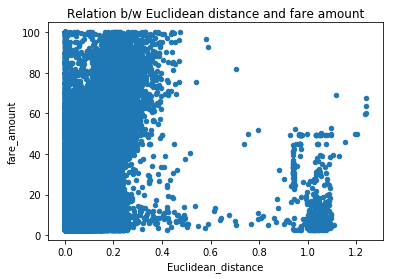

In [31]:
plot = df_train.iloc[:3000000].plot.scatter('Euclidean_distance', 'fare_amount') # Scatter plot
#df_train = df_train[df_train.Euclidean_distance > 0.0]
#plt.scatter(x=df_train['Euclidean_distance'],y=df_train['fare_amount'])
plt.title('Relation b/w Euclidean distance and fare amount')

Text(0.5,1,'Histogram ride distances in miles')

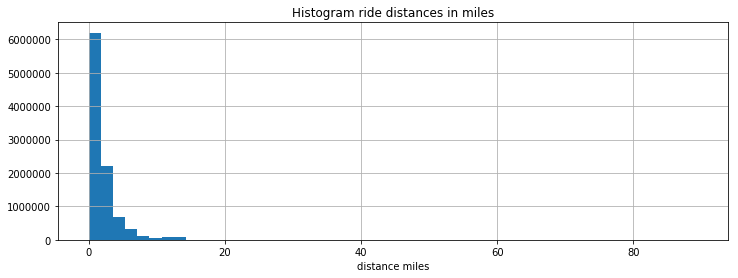

In [12]:
# This is based on the following link: https://stackoverflow.com/questions/27928/calculate-distance-between-two-latitude-longitude-points-haversine-formula
# Haversine distance
def Haversine_distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295 # Pi/180
    a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p)) / 2
    return 0.6213712 * 12742 * np.arcsin(np.sqrt(a)) # 2*R*asin...

#Plot b/w time of day and distance travelled - Histogram
df_train['distance_miles'] = Haversine_distance(df_train.pickup_latitude, df_train.pickup_longitude, \
                                      df_train.dropoff_latitude, df_train.dropoff_longitude)
df_train.head(10)
df_train.distance_miles.hist(bins=50, figsize=(12,4))
plt.xlabel('distance miles')
plt.title('Histogram ride distances in miles')
#df_train.distance_miles.describe()

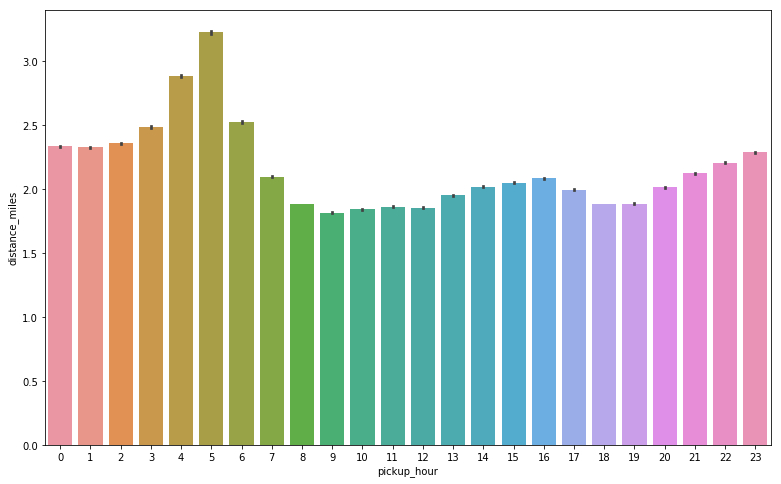

In [23]:
plt.figure(figsize=(13,8))
sns.barplot(x='pickup_hour', y='distance_miles', data = df_train)

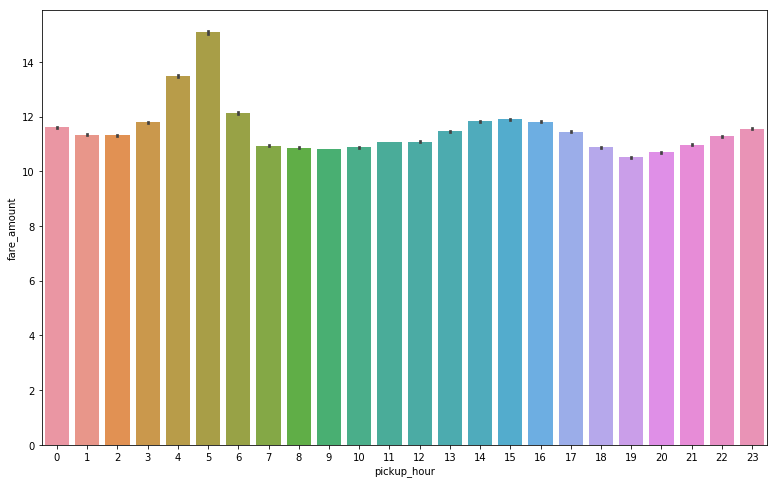

In [24]:
#hour_fare_amount_plot = df_train.groupby(['pickup_hour'])['fare_amount']
plt.figure(figsize=(13,8))
sns.barplot(x='pickup_hour', y='fare_amount', data = df_train)

In [ ]:
#https://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html
pvt_table = pd.pivot_table(df_train, values='distance_miles', index='pickup_hour', aggfunc =('mean','median'))
pvt_table

Text(0.5,0,'Time of day')

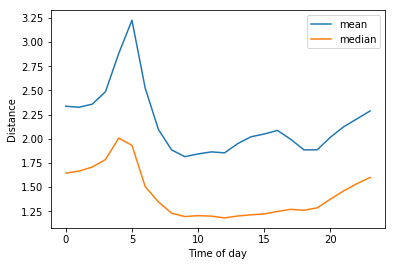

In [26]:
pvt_table[['mean','median']].plot()
plt.ylabel('Distance')
plt.xlabel('Time of day')

In [54]:
# Exciting plot!!!
#Used this for bounding coordinates for the boroughs - https://www.mapdevelopers.com/geocode_bounding_box.php 
nyc_borough = {
    'Manhattan':{
        'min_long':-74.047,
        'min_lat':40.680,
        'max_long':-73.907,
        'max_lat':40.882 }, 
    'Staten_Island':{
        'min_long':-74.259,
        'min_lat':40.477,
        'max_long':-74.034,
        'max_lat':40.652 }, 
    'Queens':{
        'min_long':-74.042,
        'min_lat':40.489,
        'max_long':-73.700,
        'max_lat':40.812 }, 
    'Brooklyn':{
        'min_long':-74.057,
        'min_lat':40.551,
        'max_long':-73.833,
        'max_lat':40.739 }, 
    'Bronx':{
        'min_long':-73.933,
        'min_lat':40.786,
        'max_long':-73.748,
        'max_lat':40.917 } }

#Separating the pickup and dropoff to either of the 5 boroughs and the rest of pickups and dropoffs
def Borough(lat, long):
    location = nyc_borough.keys()
    for locn in location:
        if lat>=nyc_borough[locn]['min_lat'] and lat<=nyc_borough[locn]['max_lat'] and long>=nyc_borough[locn]['min_long'] and long<=nyc_borough[locn]['max_long']:
            return locn
    return 'Other'

df_train['pickup_borough'] = df_train.apply(lambda x:Borough(x['pickup_latitude'], x['pickup_longitude']), axis = 1)
df_train['dropoff_borough'] = df_train.apply(lambda x:Borough(x['dropoff_latitude'], x['dropoff_longitude']), axis = 1)
df_train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Euclidean_distance,pickup_hour,distance_miles,pickup_borough,dropoff_borough
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,0.009436,17,0.640487,Queens,Queens
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,0.079696,16,5.250670,Manhattan,Manhattan
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,0.013674,0,0.863411,Manhattan,Manhattan
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,0.025340,4,1.739386,Manhattan,Manhattan
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,0.019470,7,1.242218,Manhattan,Manhattan


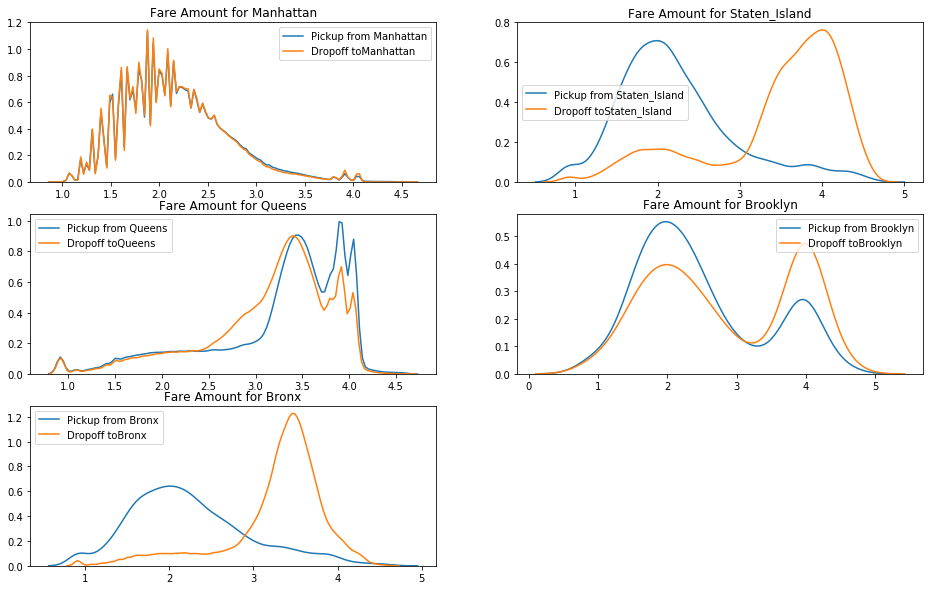

In [55]:
#Plotting the fare amount in boroughs
plt.figure(figsize=(16,10))
num = 1
for locn in nyc_borough.keys():
    plt.subplot(3,2,num)
    sns.kdeplot(np.log(df_train.loc[df_train['pickup_borough'] == locn,'fare_amount'].values),label='Pickup from '+ locn)
    sns.kdeplot(np.log(df_train.loc[df_train['dropoff_borough'] == locn,'fare_amount'].values),label='Dropoff to'+ locn).set_title("Fare Amount for "+locn)
    num += 1

Text(0,0.5,'distance(miles)')

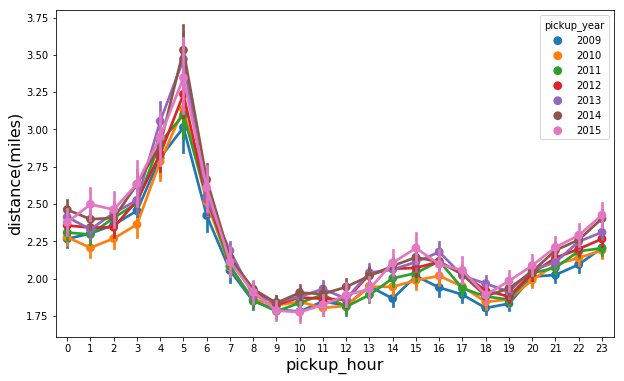

In [46]:
plt.figure(figsize=(10,6))
sns.pointplot(x='pickup_hour',y='distance_miles',data=df_train.iloc[:1000000],kind='point',hue='pickup_year')
plt.xlabel('pickup_hour',fontsize=16)
plt.ylabel('distance(miles)',fontsize=16)

In [59]:
# Exciting plot 2 - Pickups and dropoffs from JFK
jfk_coordinates ={'min_lng':-73.8352,
     'min_lat':40.6195,
     'max_lng':-73.7401, 
     'max_lat':40.6659}
jfk_pickup=df_train.loc[(df_train.pickup_latitude>=jfk_coordinates['min_lat']) & (df_train.pickup_latitude<=jfk_coordinates['max_lat'])]
jfk_pickup=jfk_pickup.loc[(df_train.pickup_longitude>=jfk_coordinates['min_lng']) & (df_train.pickup_longitude<=jfk_coordinates['max_lng'])]

#print("Number of Trips with Pickups from JFK",jfk_pickup.shape[0])

jfk_dropoff=df_train.loc[(df_train.dropoff_latitude>=jfk_coordinates['min_lat']) & (df_train.dropoff_latitude<=jfk_coordinates['max_lat'])]
jfk_dropoff=jfk_dropoff.loc[(df_train.dropoff_longitude>=jfk_coordinates['min_lng']) & (df_train.dropoff_longitude<=jfk_coordinates['max_lng'])]

#print("Number of Trips with Dropoffs to JFK",jfk_dropoff.shape[0])

Number of Trips with Pickups from JFK 299841
Number of Trips with Dropoffs to JFK 152176


Text(0.5,1,'Fare Amount Distribution for dropoffs to JFK')

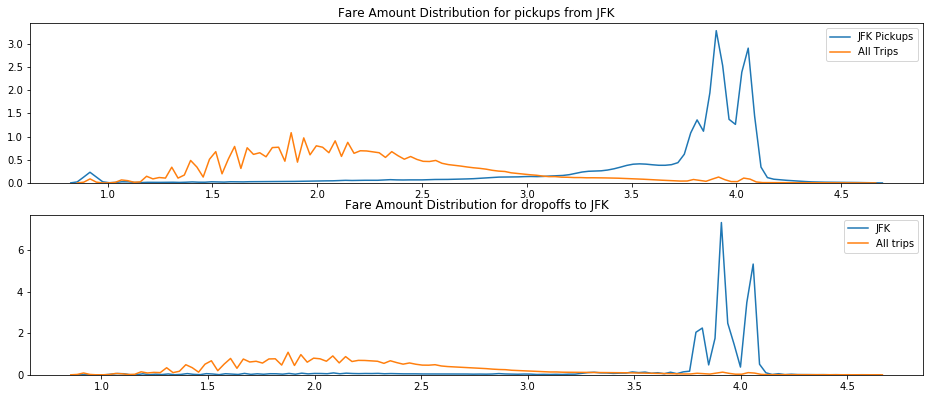

In [68]:
plt.figure(figsize=(16,10))
plt.subplot(3,1,1)
sns.kdeplot(np.log(jfk_pickup['fare_amount'].values),label='JFK Pickups')
sns.kdeplot(np.log(df_train['fare_amount'].values),label='All Trips')
plt.title("Fare Amount Distribution for pickups from JFK")

plt.subplot(3,1,2)
sns.kdeplot(np.log(jfk_dropoff['fare_amount'].values),label='JFK')
sns.kdeplot(np.log(df_train['fare_amount'].values),label='All trips')
plt.title("Fare Amount Distribution for dropoffs to JFK")

In [70]:
del jfk_pickup
del jfk_dropoff

In [32]:
import calendar
#df_train['pickup_day'] = df_train['pickup_datetime'].apply(lambda x:x.day)
#df_train['pickup_day_of_week'] = df_train['pickup_datetime'].apply(lambda x:calendar.day_name[x.weekday()])
df_train['pickup_month'] = df_train['pickup_datetime'].apply(lambda x:x.month)
df_train['pickup_year'] = df_train['pickup_datetime'].apply(lambda x:x.year)

In [33]:
#### BASELINE MODEL
idx = df_train.Euclidean_distance > 0
coord_feature = ['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']
date_time_feature = ['pickup_year', 'pickup_month', 'pickup_hour']
features = ['Euclidean_distance', 'passenger_count'] + coord_feature
X = df_train[idx][features].values
y = df_train[idx]['fare_amount'].values
df_train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_hour,Euclidean_distance,pickup_month,pickup_year
count,9.680348e+06,9.680348e+06,9.680348e+06,9.680348e+06,9.680348e+06,9.680348e+06,9.680348e+06,9.680348e+06,9.680348e+06,9.680348e+06
mean,1.128395e+01,-7.397551e+01,4.075098e+01,-7.397463e+01,4.075132e+01,1.684940e+00,1.351351e+01,3.437612e-02,6.267523e+00,2.011742e+03
std,9.326428e+00,3.576844e-02,2.778571e-02,3.460480e-02,3.112640e-02,1.313636e+00,6.515152e+00,4.011240e-02,3.436741e+00,1.864039e+00
min,2.500000e+00,-7.449367e+01,4.050010e+01,-7.449991e+01,4.050003e+01,0.000000e+00,0.000000e+00,1.000000e-06,1.000000e+00,2.009000e+03
25%,6.000000e+00,-7.399230e+01,4.073658e+01,-7.399159e+01,4.073561e+01,1.000000e+00,9.000000e+00,1.304709e-02,3.000000e+00,2.010000e+03
50%,8.500000e+00,-7.398213e+01,4.075337e+01,-7.398064e+01,4.075389e+01,1.000000e+00,1.400000e+01,2.200938e-02,6.000000e+00,2.012000e+03
75%,1.250000e+01,-7.396847e+01,4.076754e+01,-7.396554e+01,4.076840e+01,2.000000e+00,1.900000e+01,3.894018e-02,9.000000e+00,2.013000e+03
max,1.000000e+02,-7.280843e+01,4.175844e+01,-7.281059e+01,4.173163e+01,2.080000e+02,2.300000e+01,1.526636e+00,1.200000e+01,2.015000e+03


In [34]:
print(X.shape, y.shape)
from sklearn.model_selection import train_test_split
X_train, X_validn, y_train, y_validn = train_test_split(X, y, test_size=0.20)

(9680348, 6) (9680348,)


Coefficients are: [ 1.93169783e+02  4.84653537e-02 -1.87116100e+01  2.70336007e+00
 -1.41495070e+01 -5.88534384e-02]
R-squared value: 0.7376540239564837
Root mean square error: 4.773698731291402
Mean absolute percentage error: 24.38808235320281


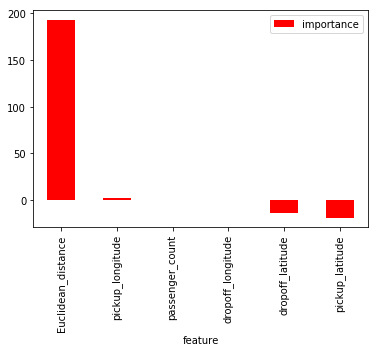

In [35]:
#Linear Regression Model
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


model_lin = LinearRegression()
model_lin.fit(X_train, y_train)

y_validn_pred = model_lin.predict(X_validn)

#Features importance
feature_importance = pd.DataFrame({'feature': features, 'importance': model_lin.coef_}).\
                           sort_values('importance', ascending = False).set_index('feature')
#Error metrics
#Root mean square error
rmse = np.sqrt(mean_squared_error(y_validn, y_validn_pred))

#Mean absolute percentage error 
mape = np.mean(abs((y_validn - y_validn_pred)/y_validn)) * 100

#R-squared value
r2 = r2_score(y_validn, y_validn_pred)


print("Coefficients are:",model_lin.coef_)
print('R-squared value:',r2)
print('Root mean square error:',rmse)
print('Mean absolute percentage error:',mape)

feature_importance.plot.bar(color = 'r', linewidth = 2)

In [41]:
#For generating submission.csv for the Linear Regression Model
def submission_models(model, features):
    Testing = df_test[features].values
    y_pred = model.predict(Testing)
    submission = pd.DataFrame( {'key': df_test.key, 'fare_amount': y_pred},columns = ['key', 'fare_amount'])
    submission.to_csv('submission.csv', index = False)
    return submission

In [42]:
df_test['Euclidean_distance'] = np.sqrt(np.square(df_test.dropoff_longitude - df_test.pickup_longitude) + np.square(df_test.dropoff_latitude - df_test.pickup_latitude))

In [43]:
submission = submission_models(model_lin, features)
submission

,key,fare_amount
0,2015-01-27 13:08:24.0000002,8.646569
1,2015-01-27 13:08:24.0000003,9.821846
2,2011-10-08 11:53:44.0000002,5.794150
3,2012-12-01 21:12:12.0000002,7.879606
4,2012-12-01 21:12:12.0000003,13.789256
5,2012-12-01 21:12:12.0000005,10.587303
6,2011-10-06 12:10:20.0000001,6.086113
7,2011-10-06 12:10:20.0000003,52.653127
8,2011-10-06 12:10:20.0000002,12.565021
9,2014-02-18 15:22:20.0000002,6.449526


In [44]:
#Random Forest Regression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def Random_Forest(features, X_train, y_train, X_validn, y_validn):
    '''
    model_rf = Pipeline((
            ("standard_scaler", StandardScaler()),
            ("random_forest", RandomForestRegressor(max_depth=20, random_state=0)),
        ))
    '''
    
    model_rf = RandomForestRegressor(max_depth=20, random_state=0)
    model_rf.fit(X_train, y_train)

    y_validn_pred = model_rf.predict(X_validn)

    #Feature importance
    feature_importance = pd.DataFrame({'feature': features, 'importance': model_rf.feature_importances_}).\
                               sort_values('importance', ascending = False).set_index('feature')

    #Error metrics
    #Root mean square error
    rmse = np.sqrt(mean_squared_error(y_validn, y_validn_pred))

    #Mean absolute percentage error 
    mape = np.mean(abs((y_validn - y_validn_pred)/y_validn)) * 100

    #R-squared value
    r2 = r2_score(y_validn, y_validn_pred)

    print('Coefficients are:', model_rf.feature_importances_)
    print('Root mean square error:',rmse)
    print('Mean absolute percentage error:',mape)
    print('R-squared value:',r2)

    feature_importance.plot.bar(color = 'r', linewidth = 2)
    return model_rf

Coefficients are: [0.8855075  0.00215886 0.01940526 0.02397747 0.02612065 0.04283026]
Root mean square error: 3.8475762439528616
Mean absolute percentage error: 19.503190090882345
R-squared value: 0.8395552154878944


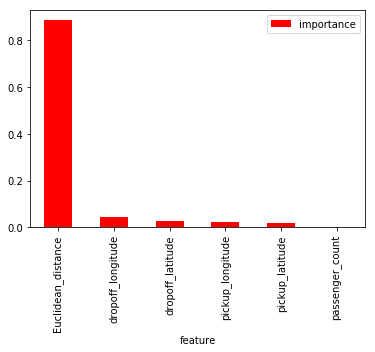

In [109]:
#Call the RF method with basic features and data splits
features = ['Euclidean_distance', 'passenger_count'] + coord_feature
X = df_train[idx][features].values
y = df_train[idx]['fare_amount'].values
X_train, X_validn, y_train, y_validn = train_test_split(X, y, test_size=0.20)
model_rf = Random_Forest(features, X_train, y_train, X_validn, y_validn)

In [110]:
submission = submission_models(model_rf, features)
submission

,key,fare_amount
0,2015-01-27 13:08:24.0000002,9.920940
1,2015-01-27 13:08:24.0000003,10.033709
2,2011-10-08 11:53:44.0000002,4.632962
3,2012-12-01 21:12:12.0000002,8.236882
4,2012-12-01 21:12:12.0000003,16.122489
5,2012-12-01 21:12:12.0000005,10.561932
6,2011-10-06 12:10:20.0000001,4.978506
7,2011-10-06 12:10:20.0000003,48.854342
8,2011-10-06 12:10:20.0000002,11.466229
9,2014-02-18 15:22:20.0000002,6.732578


Coefficients are: [0.88348616 0.00126423 0.012084   0.01707554 0.01700597 0.02987647
 0.02496459 0.00567231 0.00857073]
Root mean square error: 3.21028058288927
Mean absolute percentage error: 16.957252742072384
R-squared value: 0.8814490868094399


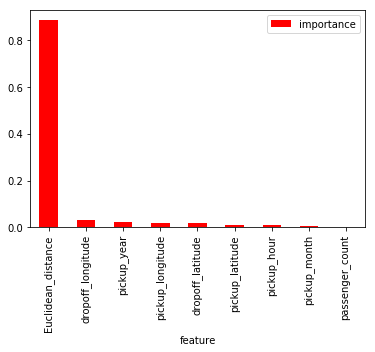

In [45]:
#Call the RF method with extra features and data splits
features = ['Euclidean_distance', 'passenger_count'] + coord_feature + date_time_feature
X = df_train[idx][features].values
y = df_train[idx]['fare_amount'].values
X_train, X_validn, y_train, y_validn = train_test_split(X, y, test_size=0.20)
model_rf = Random_Forest(features, X_train, y_train, X_validn, y_validn)

In [46]:
# add new columns to test dataframe 
df_test['pickup_datetime'] = pd.to_datetime(df_test['pickup_datetime'], format='%Y-%m-%d %H:%M:%S UTC')
df_test['pickup_year'] = df_test.pickup_datetime.apply(lambda t: t.year)
df_test['pickup_month'] = df_test.pickup_datetime.apply(lambda t: t.month)
df_test['pickup_hour'] = df_test.pickup_datetime.apply(lambda t: t.hour)

In [47]:
submission = submission_models(model_rf, features)
submission

,key,fare_amount
0,2015-01-27 13:08:24.0000002,9.915628
1,2015-01-27 13:08:24.0000003,10.440719
2,2011-10-08 11:53:44.0000002,5.021647
3,2012-12-01 21:12:12.0000002,8.300644
4,2012-12-01 21:12:12.0000003,15.245330
5,2012-12-01 21:12:12.0000005,10.881368
6,2011-10-06 12:10:20.0000001,5.049509
7,2011-10-06 12:10:20.0000003,48.864144
8,2011-10-06 12:10:20.0000002,11.450861
9,2014-02-18 15:22:20.0000002,6.682900


References:
1. https://www.kaggle.com/breemen/nyc-taxi-fare-data-exploration/notebook
2. https://www.kaggle.com/aiswaryaramachandran/eda-and-feature-engineering
3. https://www.kaggle.com/willkoehrsen/a-walkthrough-and-a-challenge
4. https://www.mapdevelopers.com/geocode_bounding_box.php
5. https://stackoverflow.com/questions/27928/calculate-distance-between-two-latitude-longitude-points-haversine-formula
6. https://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html